In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
warnings.filterwarnings('ignore')

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)

Numpy Version 1.25.2
Pandas Version 2.0.3
Seaborn Version 0.13.1


In [3]:
# Loading the Data set in the dataframe
edf = pd.read_csv('hotel_bookings_EDF_lt.csv')

# Checking the firat 5 rows of the data
edf.head()

,hotel,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests,lead_time_days
0,1,0,0,0,2,0,3,135,3,1,...,2,2,3,0,14.0,0,2,0,0,342.0
1,1,0,0,0,2,0,3,135,3,1,...,2,2,4,0,14.0,0,2,0,0,737.0
2,1,0,0,1,1,0,3,59,3,1,...,0,2,0,0,14.0,0,2,0,0,7.0
3,1,0,0,1,1,0,3,59,2,0,...,0,0,0,0,304.0,0,2,0,0,13.0
4,1,0,0,2,2,0,3,59,6,3,...,0,0,0,0,240.0,0,2,0,1,14.0


In [4]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119390 non-null  int64  
 6   meal                            119390 non-null  int64  
 7   country                         119390 non-null  int64  
 8   market_segment                  119390 non-null  int64  
 9   distribution_channel            119390 non-null  int64  
 10  is_repeated_customer            119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [5]:
X = edf.drop(columns=['is_canceled'], axis = 1)
y = edf['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.to_csv('/content/X_train_withoutliers.csv')
X_test.to_csv('/content/X_test_withoutliers.csv')
y_train.to_csv('/content/y_train_withoutliers.csv')
y_test.to_csv('/content/y_test_withoutliers.csv')

In [6]:
X_train.shape

(83573, 22)

In [7]:
X_test.shape

(35817, 22)

In [8]:
y.value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

#Random Forest

In [9]:
rf = RandomForestClassifier(random_state= 50).fit(X_train, y_train)

In [10]:
# Making predictions
y_pred = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [11]:
# Classification Report for train set
class_report = classification_report(y_train, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52688
           1       0.99      0.99      0.99     30885

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



In [12]:
# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     22478
           1       0.86      0.81      0.83     13339

    accuracy                           0.88     35817
   macro avg       0.88      0.86      0.87     35817
weighted avg       0.88      0.88      0.88     35817



In [13]:
# Confusion Matrix for train data
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[52455   233]
 [  443 30442]]


In [14]:
# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix_test)

Confusion Matrix:
 [[20751  1727]
 [ 2590 10749]]


Confusion Matrix for Random Forest Model  on Test Data


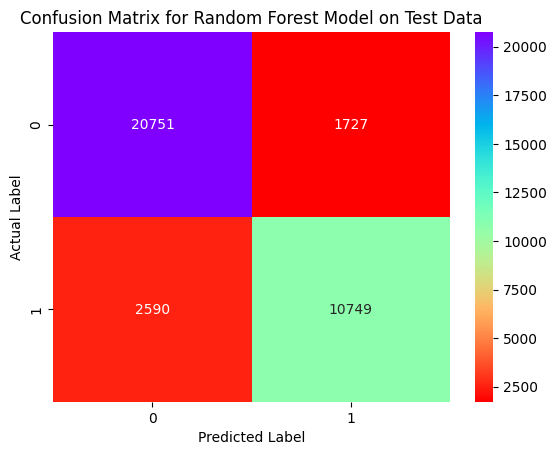

In [15]:
print('Confusion Matrix for Random Forest Model  on Test Data')
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='d',cbar=True,cmap='rainbow_r')
plt.title('Confusion Matrix for Random Forest Model on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
def plot_learning_curve(estimator, X, y, title='Learning Curve', cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.legend(loc='best')
    plt.show()

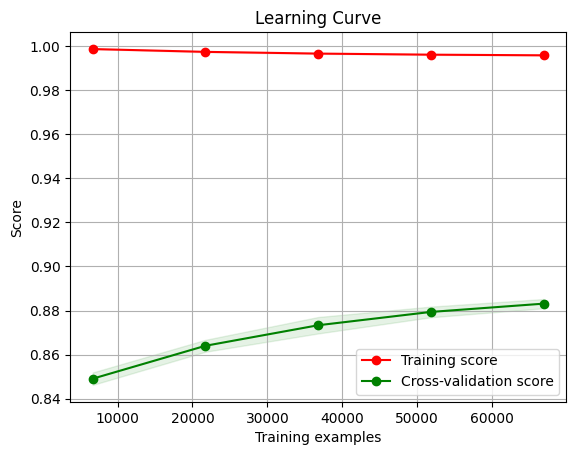

In [ ]:
# Assuming you have a model, X_train, y_train
plot_learning_curve(rf, X_train, y_train)

In [16]:
y_pred_proba = rf.predict_proba(X_train)[:, 1]
y_pred_proba_test = rf.predict_proba(X_test)[:, 1]

In [17]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

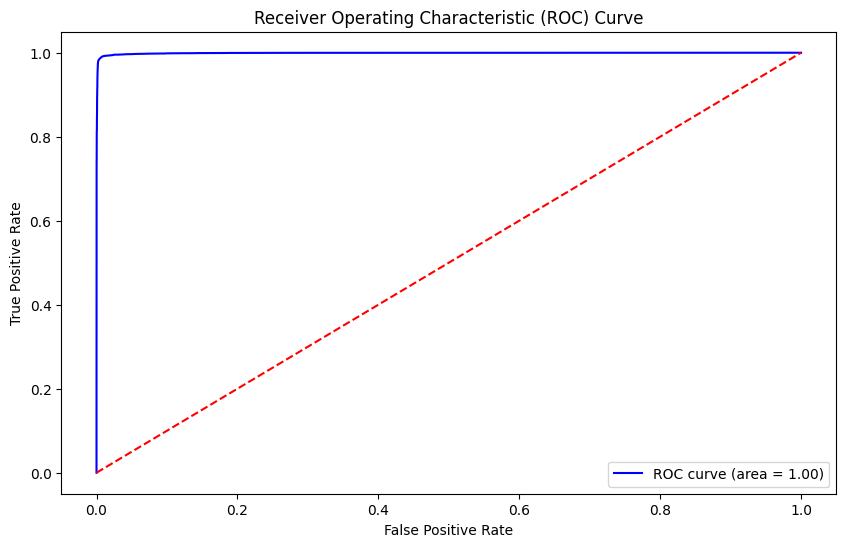

AUC: 0.9992093046110487


In [18]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc}")

In [19]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr, tpr)

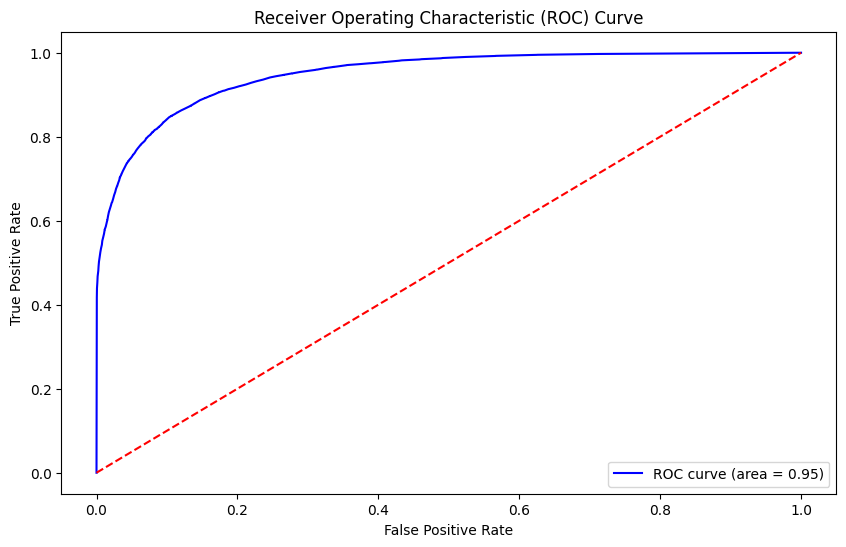

AUC: 0.9480973561367658


In [20]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test}")

In [21]:
# Feature Selection
rf_feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_feature_scores

lead_time_days                    0.216670
country                           0.143674
deposit_type                      0.125472
agent                             0.074253
totalno_of_special_requests       0.062874
stays_in_week_nights              0.054875
market_segment                    0.052455
previous_cancellations            0.034630
stays_in_weekend_nights           0.032484
assigned_room_type                0.030031
customer_type                     0.029625
booking_changes                   0.023800
required_car_parking_spaces       0.023097
reserved_room_type                0.019279
adults                            0.017612
meal                              0.016036
distribution_channel              0.011667
hotel                             0.010615
children                          0.009403
previous_bookings_not_canceled    0.005542
days_in_waiting_list              0.003282
is_repeated_customer              0.002624
dtype: float64

In [22]:
X_train_rff = X_train.drop(['days_in_waiting_list', 'is_repeated_customer', 'previous_bookings_not_canceled','children'], axis = 1 )
X_test_rff = X_test.drop(['days_in_waiting_list', 'is_repeated_customer', 'previous_bookings_not_canceled','children'], axis = 1 )

In [23]:
rf_f = RandomForestClassifier(random_state= 50).fit(X_train_rff, y_train)

In [24]:
y_pred_rf_f = rf_f.predict(X_train_rff)
y_pred_rftest_f = rf_f.predict(X_test_rff)

In [25]:
# Classification Report for train set
rff_class_report = classification_report(y_train, y_pred_rf_f)
print("Classification Report:\n", rff_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52688
           1       0.99      0.98      0.99     30885

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



In [26]:
# Classification Report for test set
rff_class_report_test = classification_report(y_test, y_pred_rftest_f)
print("Classification Report:\n", rff_class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     22478
           1       0.86      0.81      0.83     13339

    accuracy                           0.88     35817
   macro avg       0.87      0.86      0.87     35817
weighted avg       0.88      0.88      0.88     35817



In [ ]:
# Confusion Matrix for train data
conf_matrix_rff = confusion_matrix(y_train, y_pred_rf_f)
print("Confusion Matrix:\n", conf_matrix_rff)

Confusion Matrix:
 [[52539   149]
 [  226 30659]]


In [ ]:
# Confusion Matrix for test data
conf_matrix_test_rff = confusion_matrix(y_test, y_pred_rftest_f)
print("Confusion Matrix:\n", conf_matrix_test_rff)

Confusion Matrix:
 [[21097  1381]
 [ 2595 10744]]


In [27]:
y_pred_proba_rff = rf_f.predict_proba(X_train_rff)[:, 1]
y_pred_proba_test_rff = rf_f.predict_proba(X_test_rff)[:, 1]

In [28]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_rff)
roc_auc_rff = auc(fpr, tpr)

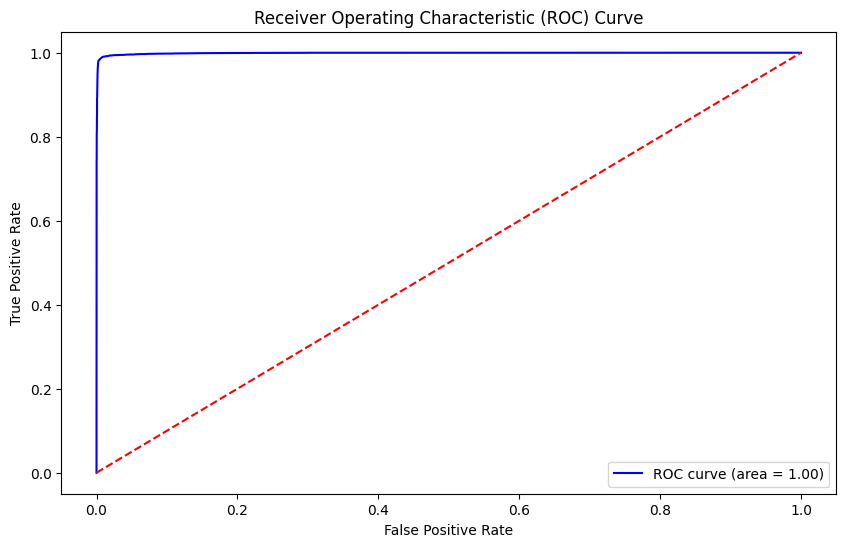

AUC: 0.9990964348190571


In [29]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_rff)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_rff}")

In [30]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_rff)
roc_auc_test_rff = auc(fpr, tpr)

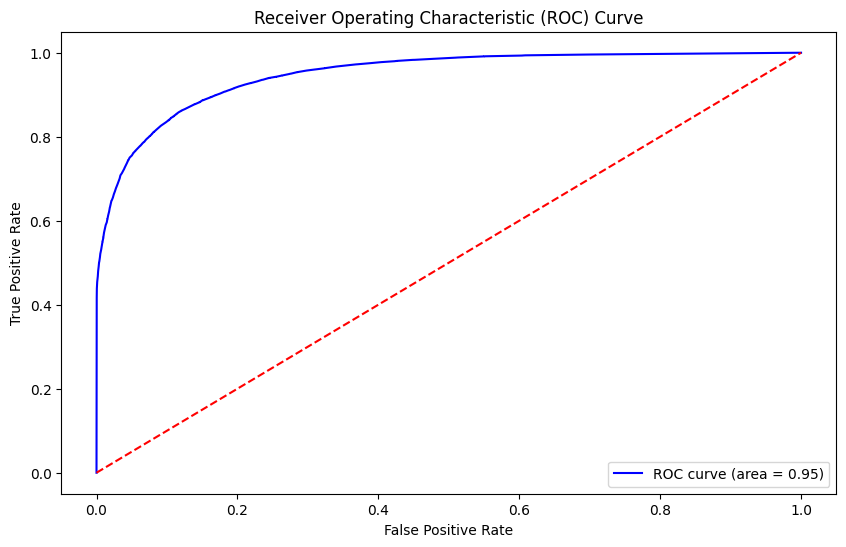

AUC: 0.9475090890446655


In [31]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_rff)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_rff}")

# Decision Tree Classifier

In [32]:
dt = DecisionTreeClassifier(random_state=50).fit(X_train, y_train)

In [33]:
y_pred_dt = dt.predict(X_train)
y_pred_dttest = dt.predict(X_test)

In [34]:
# Classification Report for train set
class_reportdt = classification_report(y_train, y_pred_dt)
print("Classification Report:\n", class_reportdt)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52688
           1       1.00      0.98      0.99     30885

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



In [35]:
# Classification Report for test set
class_report_dttest = classification_report(y_test, y_pred_dttest)
print("Classification Report:\n", class_report_dttest)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     22478
           1       0.80      0.80      0.80     13339

    accuracy                           0.85     35817
   macro avg       0.84      0.84      0.84     35817
weighted avg       0.85      0.85      0.85     35817



In [ ]:
# Confusion Matrix for train data
conf_matrixdt = confusion_matrix(y_train, y_pred_dt)
print("Confusion Matrix:\n", conf_matrixdt)

Confusion Matrix:
 [[52572   116]
 [  251 30634]]


In [ ]:
# Confusion Matrix for test data
conf_matrix_dttest = confusion_matrix(y_test, y_pred_dttest)
print("Confusion Matrix:\n", conf_matrix_dttest)

Confusion Matrix:
 [[19727  2751]
 [ 2665 10674]]


In [36]:
y_pred_proba_dt = dt.predict_proba(X_train)[:, 1]
y_pred_proba_test_dt = dt.predict_proba(X_test)[:, 1]

In [37]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_dt)
roc_auc_dt = auc(fpr, tpr)

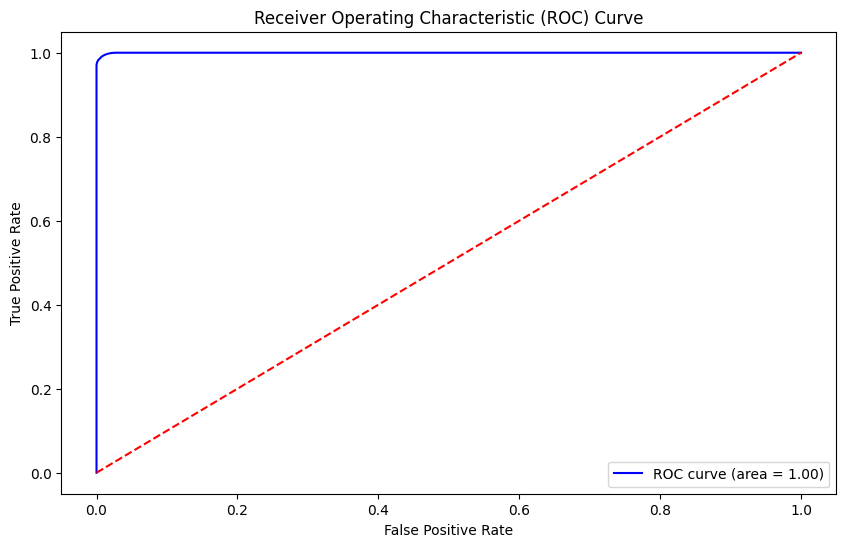

AUC: 0.9998227041618347


In [38]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_dt}")

In [39]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_dt)
roc_auc_test_dt = auc(fpr, tpr)

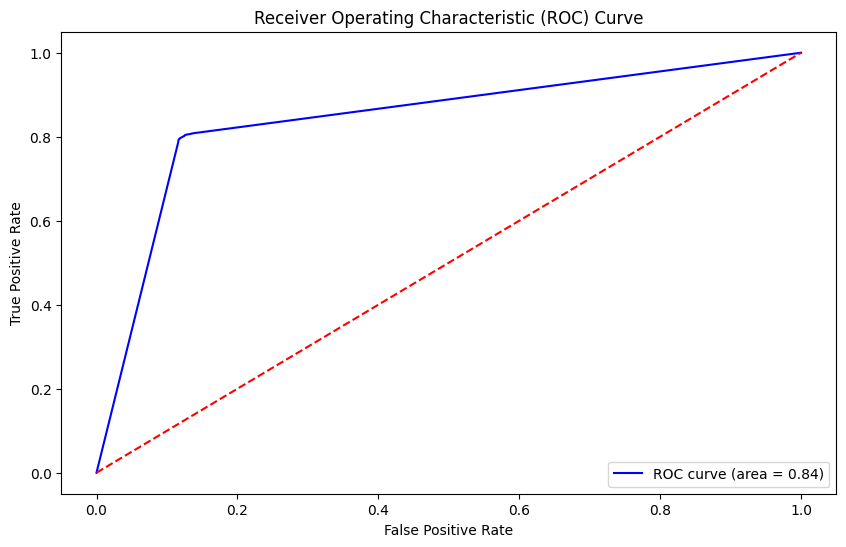

AUC: 0.8427156546820659


In [40]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_dt}")

In [41]:
# Feature Importance
dt_feature_scores = pd.Series(dt.feature_importances_, index=X_train. columns).sort_values(ascending=False)
dt_feature_scores

deposit_type                      0.237029
lead_time_days                    0.188812
country                           0.097905
agent                             0.070615
market_segment                    0.067263
totalno_of_special_requests       0.057328
stays_in_week_nights              0.056254
stays_in_weekend_nights           0.033198
required_car_parking_spaces       0.024533
previous_cancellations            0.023530
customer_type                     0.022034
assigned_room_type                0.021219
reserved_room_type                0.019176
booking_changes                   0.018159
adults                            0.017455
meal                              0.016822
children                          0.008673
hotel                             0.006485
previous_bookings_not_canceled    0.005818
days_in_waiting_list              0.003127
distribution_channel              0.002914
is_repeated_customer              0.001649
dtype: float64

In [42]:
X_train_dtf = X_train.drop(['days_in_waiting_list', 'is_repeated_customer', 'distribution_channel', 'previous_bookings_not_canceled'], axis = 1 )
X_test_dtf = X_test.drop(['days_in_waiting_list', 'is_repeated_customer', 'distribution_channel', 'previous_bookings_not_canceled'], axis = 1 )

In [43]:
dt_f = DecisionTreeClassifier(random_state=50).fit(X_train_dtf, y_train)

In [44]:
y_pred_dt_f = dt_f.predict(X_train_dtf)
y_pred_dttest_f = dt_f.predict(X_test_dtf)

In [45]:
# Classification Report for train set
dtf_class_report = classification_report(y_train, y_pred_dt_f)
print("Classification Report:\n", dtf_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52688
           1       1.00      0.98      0.99     30885

    accuracy                           0.99     83573
   macro avg       0.99      0.99      0.99     83573
weighted avg       0.99      0.99      0.99     83573



In [46]:
# Classification Report for test set
dtf_class_report_test = classification_report(y_test, y_pred_dttest_f)
print("Classification Report:\n", dtf_class_report_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     22478
           1       0.80      0.80      0.80     13339

    accuracy                           0.85     35817
   macro avg       0.84      0.84      0.84     35817
weighted avg       0.85      0.85      0.85     35817



In [47]:
# Confusion Matrix for train data
conf_matrix_dtf = confusion_matrix(y_train, y_pred_dt_f)
print("Confusion Matrix:\n", conf_matrix_dtf)

Confusion Matrix:
 [[52546   142]
 [  571 30314]]


In [48]:
# Confusion Matrix for test data
conf_matrix_test_dtf = confusion_matrix(y_test, y_pred_dttest_f)
print("Confusion Matrix:\n", conf_matrix_test_dtf)

Confusion Matrix:
 [[19807  2671]
 [ 2716 10623]]


In [49]:
y_pred_proba_dtf = dt_f.predict_proba(X_train_dtf)[:, 1]
y_pred_proba_test_dtf = dt_f.predict_proba(X_test_dtf)[:, 1]

In [50]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_dtf)
roc_auc_dtf = auc(fpr, tpr)

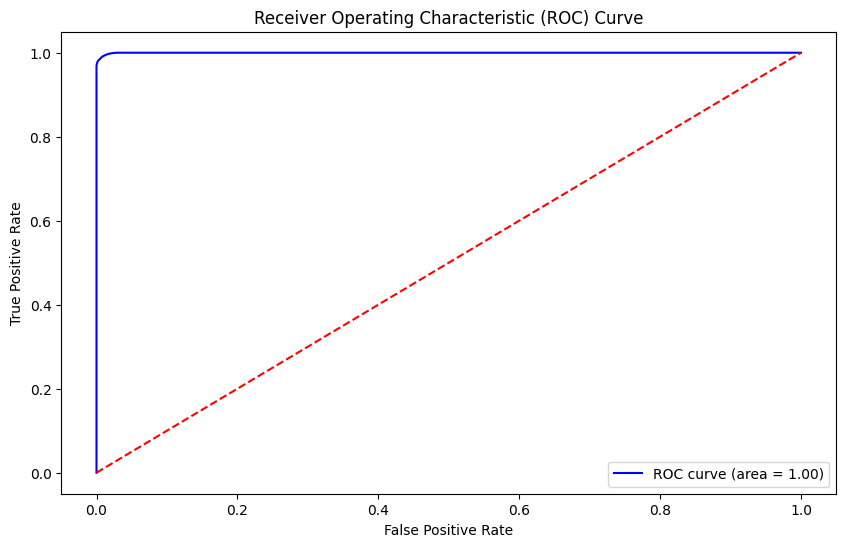

AUC: 0.9997977620637593


In [51]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_dtf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_dtf}")

In [52]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_dtf)
roc_auc_test_dtf = auc(fpr, tpr)

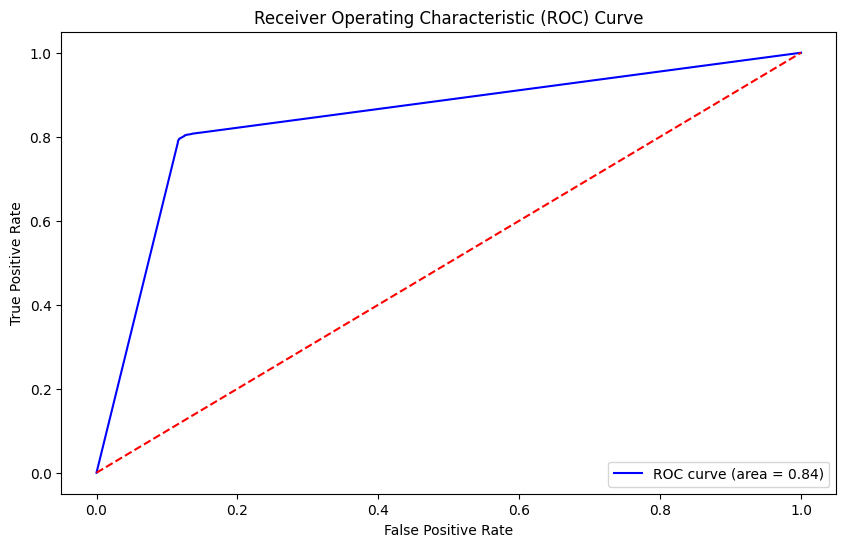

AUC: 0.842517578440943


In [53]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_dtf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_dtf}")

# Gradient Boosting Classifier

In [54]:
gb = GradientBoostingClassifier(random_state=50).fit(X_train, y_train)

In [55]:
y_pred_gb = gb.predict(X_train)
y_pred_gbtest = gb.predict(X_test)

In [56]:
# Classification Report for train set
class_reportgb = classification_report(y_train, y_pred_gb)
print("Classification Report:\n", class_reportgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     52688
           1       0.84      0.73      0.78     30885

    accuracy                           0.85     83573
   macro avg       0.85      0.82      0.83     83573
weighted avg       0.85      0.85      0.85     83573



In [57]:
# Classification Report for test set
class_report_gbtest = classification_report(y_test, y_pred_gbtest)
print("Classification Report:\n", class_report_gbtest)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89     22478
           1       0.85      0.73      0.79     13339

    accuracy                           0.85     35817
   macro avg       0.85      0.83      0.84     35817
weighted avg       0.85      0.85      0.85     35817



In [59]:
# Confusion Matrix for train data
conf_matrixgb = confusion_matrix(y_train, y_pred_gb)
print("Confusion Matrix:\n", conf_matrixgb)

Confusion Matrix:
 [[48335  4353]
 [ 8331 22554]]


In [60]:
# Confusion Matrix for test data
conf_matrix_gbtest = confusion_matrix(y_test, y_pred_gbtest)
print("Confusion Matrix:\n", conf_matrix_gbtest)

Confusion Matrix:
 [[20685  1793]
 [ 3555  9784]]


In [61]:
y_pred_proba_gb = gb.predict_proba(X_train)[:, 1]
y_pred_proba_testgb = gb.predict_proba(X_test)[:, 1]

In [62]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_gb)
roc_auc_gb = auc(fpr, tpr)

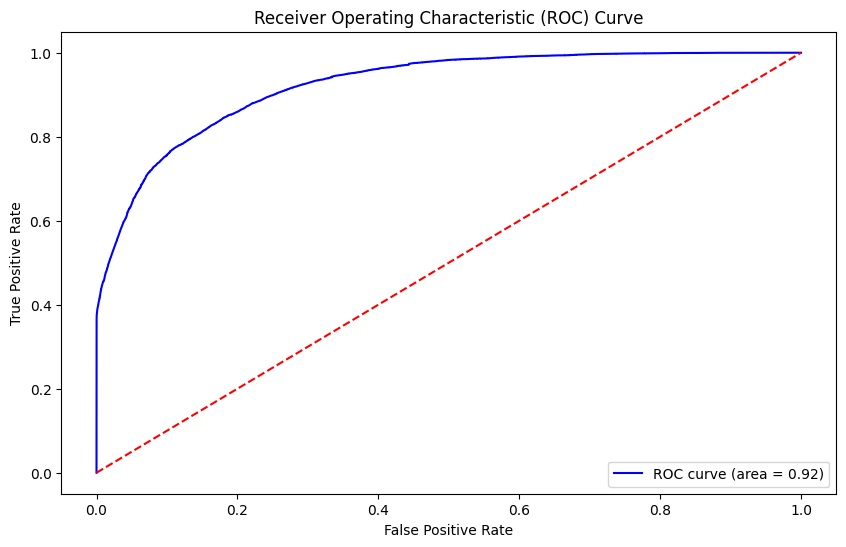

AUC: 0.9226374893865112


In [63]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_gb}")

In [64]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_testgb)
roc_auc_test_gb = auc(fpr, tpr)

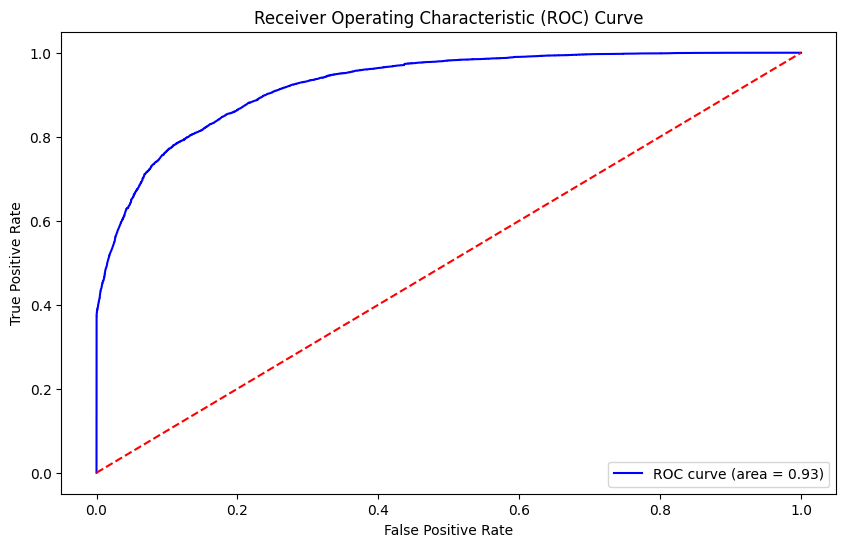

AUC: 0.9250047214452054


In [65]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_gb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_gb}")

In [66]:
# Feature Importance
gb_feature_scores = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
gb_feature_scores

deposit_type                      0.416089
country                           0.111967
lead_time_days                    0.103063
market_segment                    0.095397
totalno_of_special_requests       0.072657
previous_cancellations            0.044751
required_car_parking_spaces       0.040789
agent                             0.038814
booking_changes                   0.022105
customer_type                     0.018498
previous_bookings_not_canceled    0.012267
reserved_room_type                0.012064
assigned_room_type                0.004204
stays_in_weekend_nights           0.001815
stays_in_week_nights              0.001446
children                          0.001216
adults                            0.001049
days_in_waiting_list              0.000967
distribution_channel              0.000754
meal                              0.000088
is_repeated_customer              0.000000
hotel                             0.000000
dtype: float64

In [67]:
X_train_gbf = X_train.drop(['days_in_waiting_list','distribution_channel','meal','is_repeated_customer','hotel'],axis = 1)
X_test_gbf = X_test.drop(['days_in_waiting_list','distribution_channel','meal','is_repeated_customer','hotel'],axis = 1)

In [68]:
gb_f = GradientBoostingClassifier(random_state=50).fit(X_train_gbf, y_train)

In [69]:
y_pred_gbf = gb_f.predict(X_train_gbf)
y_pred_gbftest = gb_f.predict(X_test_gbf)

In [70]:
# Classification Report for train set
class_reportgbf = classification_report(y_train, y_pred_gbf)
print("Classification Report:\n", class_reportgbf)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     52688
           1       0.83      0.73      0.78     30885

    accuracy                           0.85     83573
   macro avg       0.84      0.82      0.83     83573
weighted avg       0.85      0.85      0.85     83573



In [71]:
# Classification Report for test set
class_report_gbftest = classification_report(y_test, y_pred_gbftest)
print("Classification Report:\n", class_report_gbftest)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88     22478
           1       0.84      0.74      0.78     13339

    accuracy                           0.85     35817
   macro avg       0.85      0.83      0.83     35817
weighted avg       0.85      0.85      0.85     35817



In [72]:
# Confusion Matrix for train data
conf_matrix_gbf = confusion_matrix(y_train, y_pred_gbf)
print("Confusion Matrix:\n", conf_matrix_gbf)

Confusion Matrix:
 [[48166  4522]
 [ 8232 22653]]


In [73]:
# Confusion Matrix for test data
conf_matrix_test_gbf = confusion_matrix(y_test, y_pred_gbftest)
print("Confusion Matrix:\n", conf_matrix_test_gbf)

Confusion Matrix:
 [[20619  1859]
 [ 3528  9811]]


In [74]:
y_pred_proba_gbf = gb_f.predict_proba(X_train_gbf)[:, 1]
y_pred_proba_test_gbf = gb_f.predict_proba(X_test_gbf)[:, 1]

In [75]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_gbf)
roc_auc_gbf = auc(fpr, tpr)

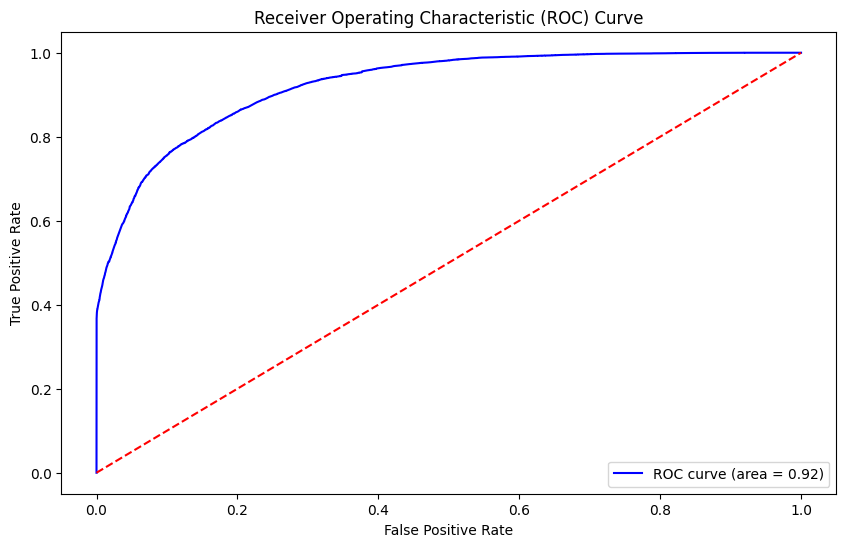

AUC: 0.9225356727770767


In [76]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_gbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_gbf}")

In [77]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_gbf)
roc_auc_test_gbf = auc(fpr, tpr)

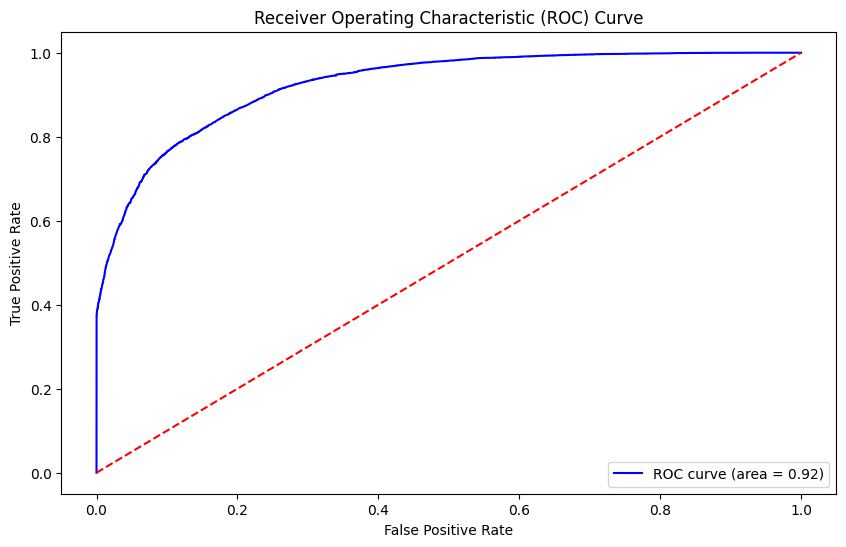

AUC: 0.9248543999550258


In [78]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_gbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_gbf}")

# ADA Boost Classifier

In [79]:
ada = AdaBoostClassifier(random_state= 50).fit(X_train, y_train)

In [80]:
y_pred_ada = ada.predict(X_train)
y_pred_adatest = ada.predict(X_test)

In [81]:
# Classification Report for train set
class_report_ada = classification_report(y_train, y_pred_ada)
print("Classification Report:\n", class_report_ada)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     52688
           1       0.82      0.69      0.75     30885

    accuracy                           0.83     83573
   macro avg       0.83      0.80      0.81     83573
weighted avg       0.83      0.83      0.83     83573



In [82]:
# Classification Report for test set
class_report_testada = classification_report(y_test, y_pred_adatest)
print("Classification Report:\n", class_report_testada)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.87     22478
           1       0.83      0.70      0.76     13339

    accuracy                           0.83     35817
   macro avg       0.83      0.81      0.82     35817
weighted avg       0.83      0.83      0.83     35817



In [83]:
# Confusion Matrix for train data
conf_matrixada = confusion_matrix(y_train, y_pred_ada)
print("Confusion Matrix:\n", conf_matrixada)

Confusion Matrix:
 [[48053  4635]
 [ 9463 21422]]


In [84]:
# Confusion Matrix for test data
conf_matrix_adatest = confusion_matrix(y_test, y_pred_adatest)
print("Confusion Matrix:\n", conf_matrix_adatest)

Confusion Matrix:
 [[20594  1884]
 [ 4042  9297]]


In [85]:
y_pred_proba_ada = ada.predict_proba(X_train)[:, 1]
y_pred_proba_testada = ada.predict_proba(X_test)[:, 1]

In [86]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_ada)
roc_auc_ada = auc(fpr, tpr)

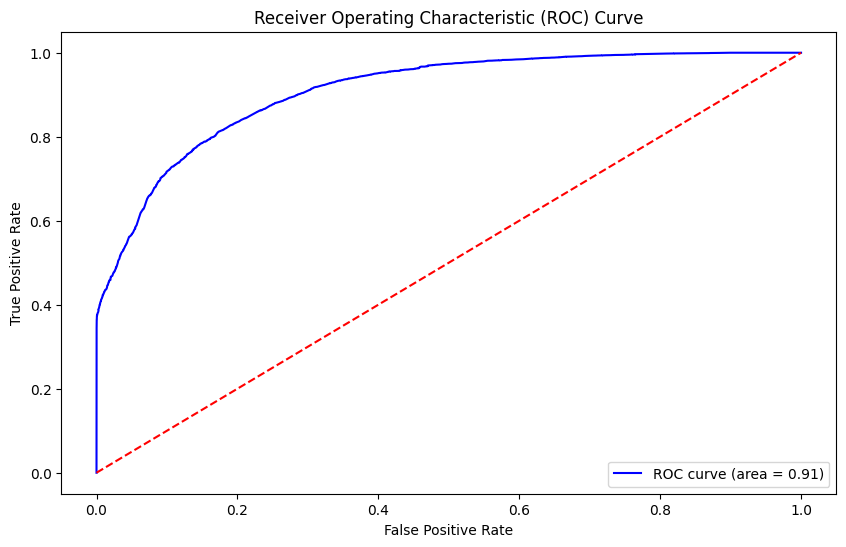

AUC: 0.9080127145306189


In [87]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_ada}")

In [88]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_testada)
roc_auc_testada = auc(fpr, tpr)

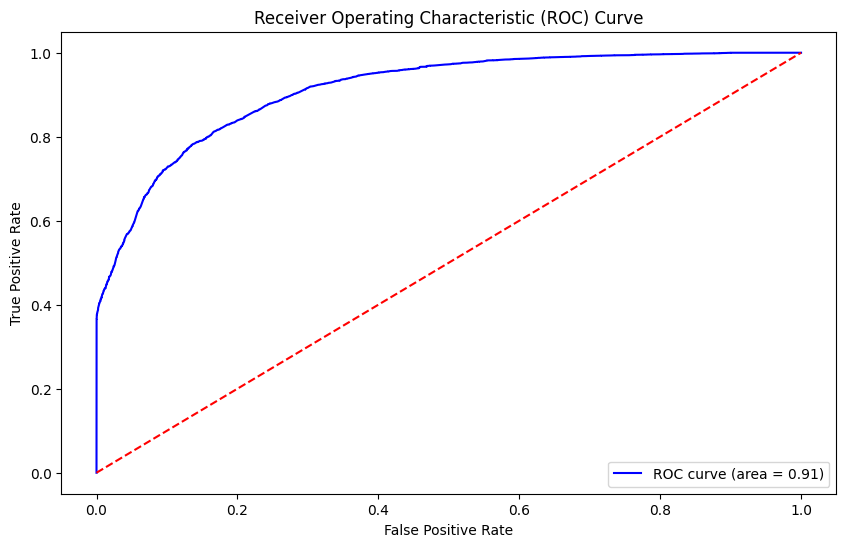

AUC: 0.9107905082372202


In [89]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_testada)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_testada}")

In [90]:
# Feature Importance
ada_feature_scores = pd.Series(ada.feature_importances_, index=X_train. columns).sort_values(ascending=False)
ada_feature_scores

agent                             0.26
country                           0.14
lead_time_days                    0.10
assigned_room_type                0.10
totalno_of_special_requests       0.06
reserved_room_type                0.06
previous_cancellations            0.04
customer_type                     0.04
deposit_type                      0.04
previous_bookings_not_canceled    0.04
market_segment                    0.04
stays_in_weekend_nights           0.02
booking_changes                   0.02
children                          0.02
required_car_parking_spaces       0.02
is_repeated_customer              0.00
distribution_channel              0.00
meal                              0.00
days_in_waiting_list              0.00
adults                            0.00
stays_in_week_nights              0.00
hotel                             0.00
dtype: float64

In [91]:
X_train_adaf = X_train.drop(['is_repeated_customer','distribution_channel','meal','days_in_waiting_list','adults','stays_in_week_nights','hotel'], axis = 1)
X_test_adaf = X_test.drop(['is_repeated_customer','distribution_channel','meal','days_in_waiting_list','adults','stays_in_week_nights','hotel'], axis = 1)

In [92]:
ada_f = AdaBoostClassifier(random_state= 50).fit(X_train_adaf, y_train)

In [93]:
y_pred_adaf = ada_f.predict(X_train_adaf)
y_pred_adaftest = ada_f.predict(X_test_adaf)

In [94]:
# Classification Report for train set
class_report_adaf = classification_report(y_train, y_pred_adaf)
print("Classification Report:\n", class_report_adaf)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     52688
           1       0.82      0.69      0.75     30885

    accuracy                           0.83     83573
   macro avg       0.83      0.80      0.81     83573
weighted avg       0.83      0.83      0.83     83573



In [95]:
# Classification Report for test set
class_report_testadaf = classification_report(y_test, y_pred_adaftest)
print("Classification Report:\n", class_report_testadaf)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.87     22478
           1       0.83      0.70      0.76     13339

    accuracy                           0.83     35817
   macro avg       0.83      0.81      0.82     35817
weighted avg       0.83      0.83      0.83     35817



In [96]:
# Confusion Matrix for train data
conf_matrix_adaf = confusion_matrix(y_train, y_pred_adaf)
print("Confusion Matrix:\n", conf_matrix_adaf)

Confusion Matrix:
 [[48053  4635]
 [ 9463 21422]]


In [97]:
# Confusion Matrix for test data
conf_matrix_adaftest = confusion_matrix(y_test, y_pred_adaftest)
print("Confusion Matrix:\n", conf_matrix_adaftest)

Confusion Matrix:
 [[20594  1884]
 [ 4042  9297]]


In [98]:
y_pred_proba_adaf = ada_f.predict_proba(X_train_adaf)[:, 1]
y_pred_proba_test_adaf = ada_f.predict_proba(X_test_adaf)[:, 1]

In [99]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_adaf)
roc_auc_adaf = auc(fpr, tpr)

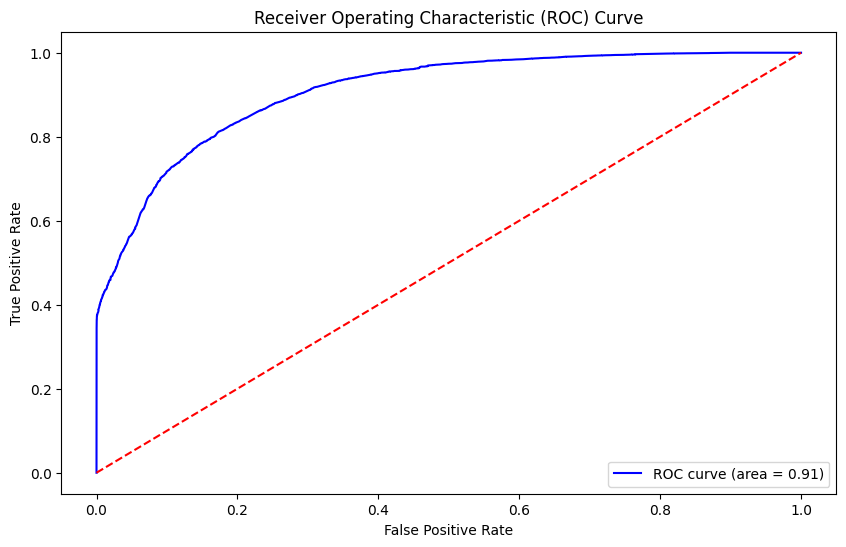

AUC: 0.9080127145306189


In [100]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_adaf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_adaf}")

In [101]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_adaf)
roc_auc_test_adaf = auc(fpr, tpr)

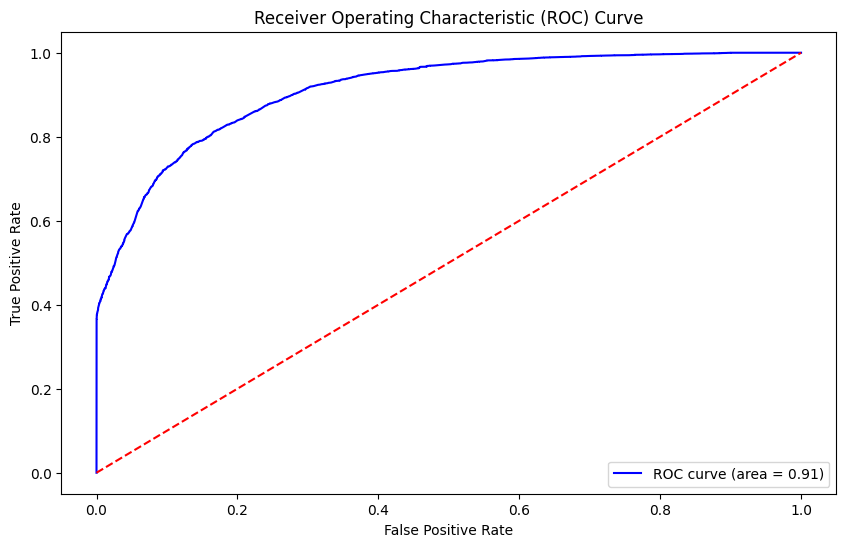

AUC: 0.9107905082372202


In [102]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_adaf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_adaf}")

#XGBOOST

In [103]:
xgb = XGBClassifier(random_state= 50).fit(X_train, y_train)

In [104]:
y_pred_xgb = xgb.predict(X_train)
y_pred_xgbtest = xgb.predict(X_test)

In [105]:
# Classification Report for train set
class_report_xgb = classification_report(y_train, y_pred_xgb)
print("Classification Report:\n", class_report_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     52688
           1       0.87      0.81      0.84     30885

    accuracy                           0.88     83573
   macro avg       0.88      0.87      0.87     83573
weighted avg       0.88      0.88      0.88     83573



In [106]:
# Classification Report for test set
class_report_testxgb = classification_report(y_test, y_pred_xgbtest)
print("Classification Report:\n", class_report_testxgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     22478
           1       0.85      0.80      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.86      0.86     35817
weighted avg       0.87      0.87      0.87     35817



In [107]:
# Confusion Matrix for train data
conf_matrix_xgb = confusion_matrix(y_train, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

Confusion Matrix:
 [[48778  3910]
 [ 5790 25095]]


In [108]:
# Confusion Matrix for test data
conf_matrix_testxgb = confusion_matrix(y_test, y_pred_xgbtest)
print("Confusion Matrix:\n", conf_matrix_testxgb)

Confusion Matrix:
 [[20647  1831]
 [ 2689 10650]]


In [109]:
y_pred_proba_xgb = xgb.predict_proba(X_train)[:, 1]
y_pred_proba_xgbtest = xgb.predict_proba(X_test)[:, 1]

In [110]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr, tpr)

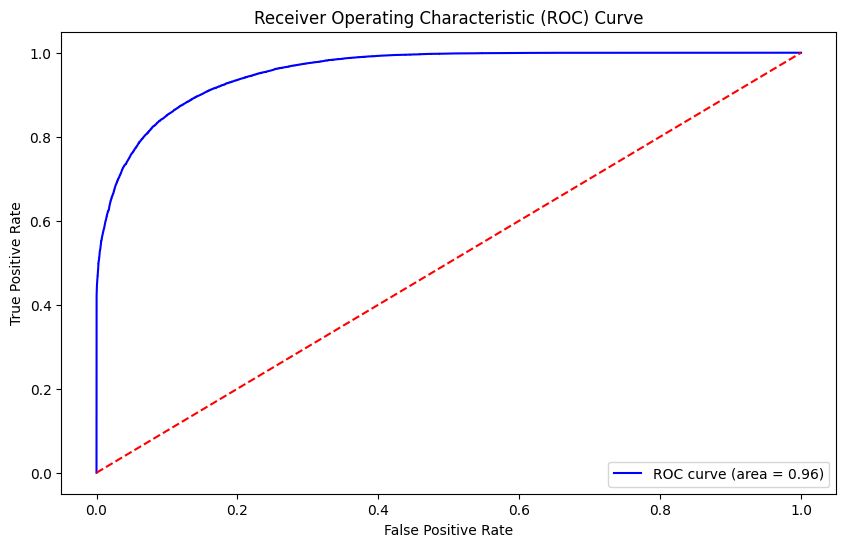

AUC: 0.956851956451106


In [111]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_xgb}")

In [112]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgbtest)
roc_auc_testxgb = auc(fpr, tpr)

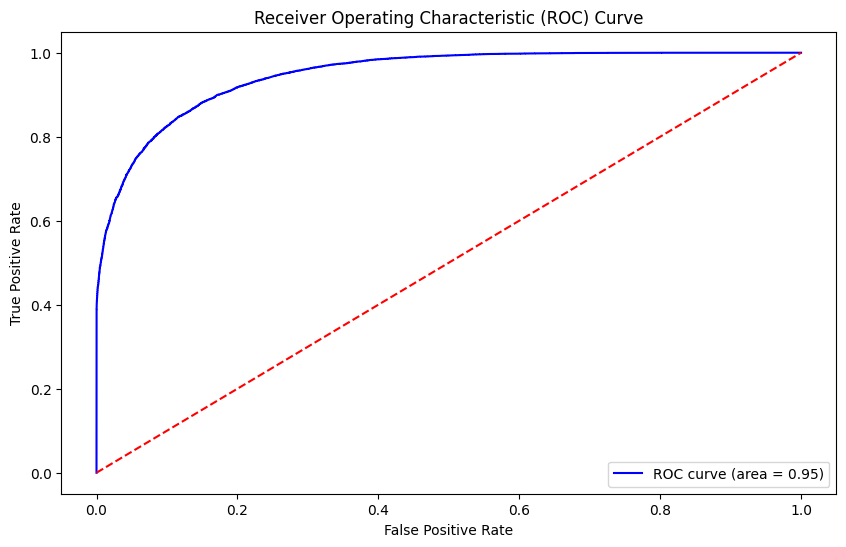

AUC: 0.9478502877935389


In [113]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_testxgb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_testxgb}")

In [114]:
# Feature Importance
xgb_feature_scores = pd.Series(xgb.feature_importances_, index=X_train. columns).sort_values(ascending=False)
xgb_feature_scores

deposit_type                      0.665167
required_car_parking_spaces       0.099296
market_segment                    0.041796
previous_cancellations            0.038359
totalno_of_special_requests       0.025166
country                           0.018674
customer_type                     0.015144
previous_bookings_not_canceled    0.012652
agent                             0.012042
reserved_room_type                0.010884
booking_changes                   0.009281
lead_time_days                    0.008258
distribution_channel              0.008161
assigned_room_type                0.005687
days_in_waiting_list              0.005113
is_repeated_customer              0.004056
meal                              0.003666
adults                            0.003606
stays_in_weekend_nights           0.003460
children                          0.003366
stays_in_week_nights              0.003233
hotel                             0.002933
dtype: float32

In [115]:
X_train_xgbf = X_train.drop(['hotel','children','adults','meal','stays_in_week_nights','stays_in_weekend_nights'], axis = 1)
X_test_xgbf = X_test.drop(['hotel','children','adults','meal','stays_in_week_nights','stays_in_weekend_nights'], axis = 1)

In [116]:
xgb_f = XGBClassifier(random_state= 50).fit(X_train_xgbf, y_train)

In [117]:
y_pred_xgbf = xgb_f.predict(X_train_xgbf)
y_pred_xgbftest = xgb_f.predict(X_test_xgbf)

In [118]:
# Classification Report for train set
class_report_xgbf = classification_report(y_train, y_pred_xgbf)
print("Classification Report:\n", class_report_xgbf)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     52688
           1       0.86      0.81      0.83     30885

    accuracy                           0.88     83573
   macro avg       0.87      0.86      0.87     83573
weighted avg       0.88      0.88      0.88     83573



In [119]:
# Classification Report for test set
class_report_testxgbf = classification_report(y_test, y_pred_xgbftest)
print("Classification Report:\n", class_report_testxgbf)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90     22478
           1       0.85      0.80      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.86      0.86     35817
weighted avg       0.87      0.87      0.87     35817



In [120]:
y_pred_proba_xgbf = xgb_f.predict_proba(X_train_xgbf)[:, 1]
y_pred_proba_test_xgbf = xgb_f.predict_proba(X_test_xgbf)[:, 1]

In [121]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_xgbf)
roc_auc_xgbf = auc(fpr, tpr)

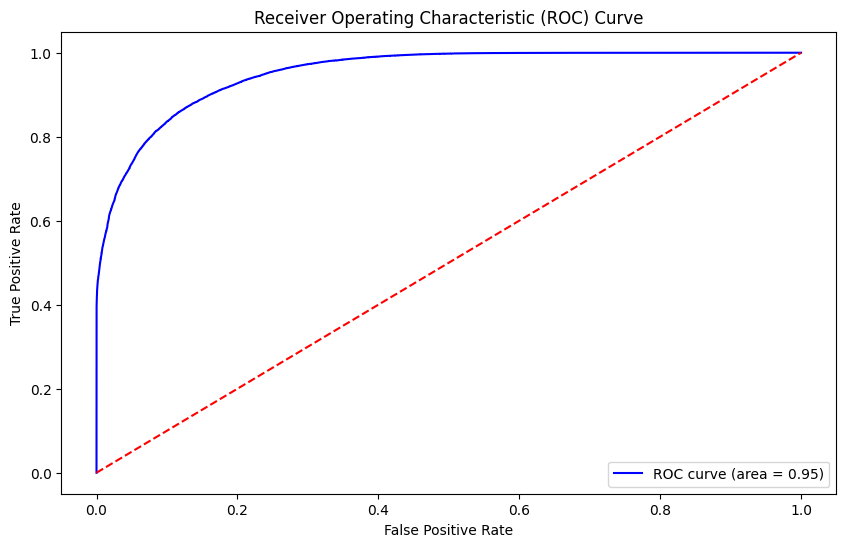

AUC: 0.9528243931021405


In [122]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_xgbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_xgbf}")

In [123]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_test_xgbf)
roc_auc_test_xgbf = auc(fpr, tpr)

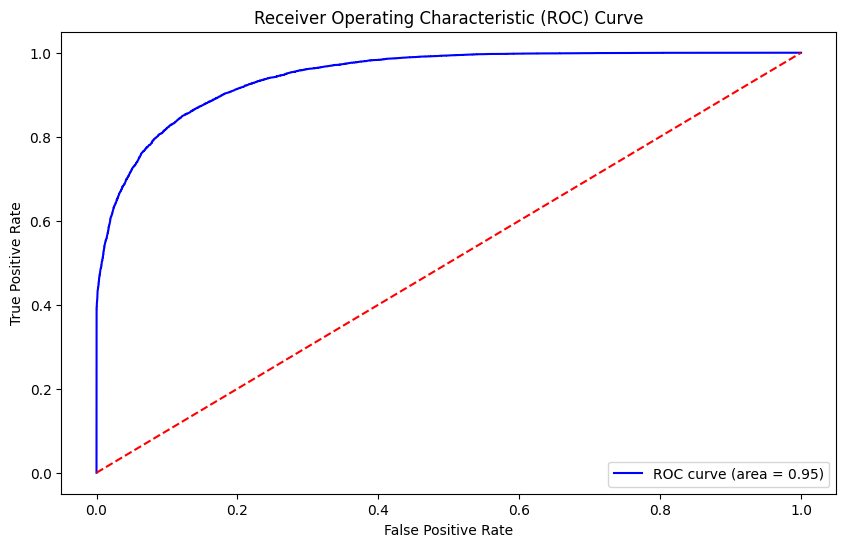

AUC: 0.9462446028726784


In [124]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_test_xgbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_test_xgbf}")

In [125]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [126]:
xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [127]:
# Print the best parameters and the best score
print(f"Best parameters: {xgb_grid_search.best_params_}")
#print(f"Best estimators: {xgb_grid_search.best_estimator_}")

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [131]:
xgb_grid = XGBClassifier(random_state= 50, colsample_bytree = 0.6, learning_rate = 0.2, max_depth = 7, n_estimators =300, subsample = 0.8 ).fit(X_train, y_train)

In [132]:
y_pred_xgbg = xgb_grid.predict(X_train)
y_pred_xgbgtest = xgb_grid.predict(X_test)

In [133]:
# Classification Report for train set
class_report_xgbg = classification_report(y_train, y_pred_xgbg)
print("Classification Report:\n", class_report_xgbg)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     52688
           1       0.89      0.85      0.87     30885

    accuracy                           0.91     83573
   macro avg       0.90      0.90      0.90     83573
weighted avg       0.91      0.91      0.91     83573



In [134]:
# Classification Report for test set
class_report_testxgbg = classification_report(y_test, y_pred_xgbgtest)
print("Classification Report:\n", class_report_testxgbg)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     22478
           1       0.86      0.81      0.83     13339

    accuracy                           0.88     35817
   macro avg       0.87      0.86      0.87     35817
weighted avg       0.88      0.88      0.88     35817



In [135]:
y_pred_proba_xgbg = xgb.predict_proba(X_train)[:, 1]
y_pred_proba_xgbgtest = xgb.predict_proba(X_test)[:, 1]

In [136]:
# ROC Curve and AUC for train set data
fpr, tpr, _ = roc_curve(y_train, y_pred_proba_xgbg)
roc_auc_xgbg = auc(fpr, tpr)

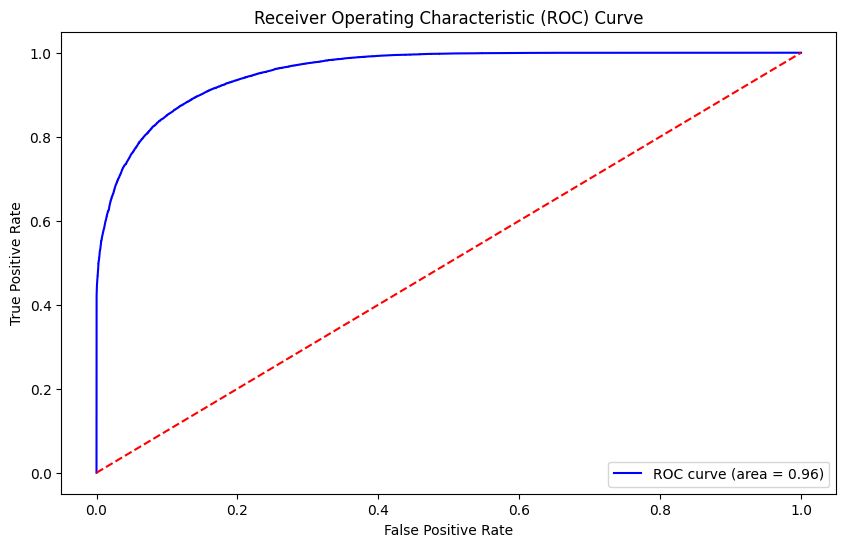

AUC: 0.956851956451106


In [137]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_xgbg)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_xgbg}")

In [138]:
# ROC Curve and AUC for testmset data
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgbgtest)
roc_auc_testxgbg = auc(fpr, tpr)

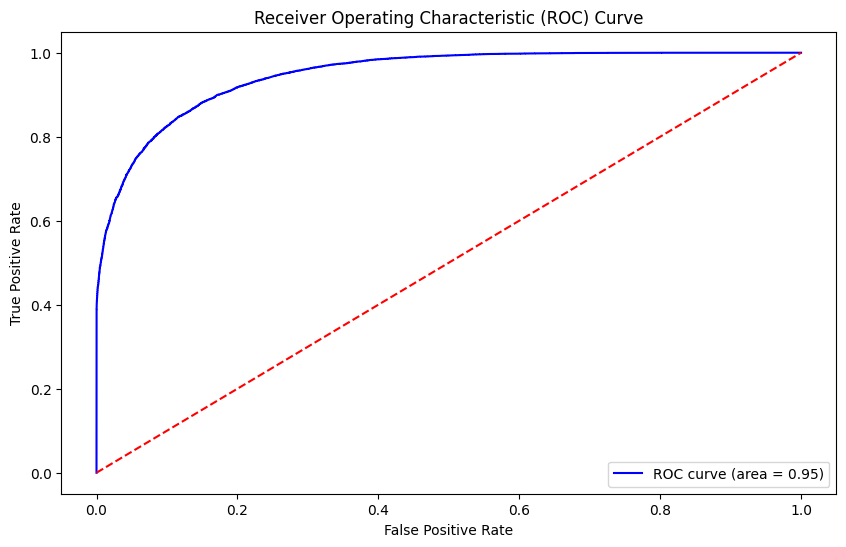

AUC: 0.9478502877935389


In [139]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_testxgbg)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {roc_auc_testxgbg}")